Importing  Libraries and Packages 


In [ ]:
!pip install --upgrade scikit-learn==0.20.3


     |████████████████████████████████| 5.4 MB 4.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.20.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading CSV file using Pandas**

In [ ]:
std = pd.read_csv('student_data_extract.csv', index_col=False)
std.head()   


,LAST_GRADEPOINT,JAMB_SCORE,SOCIAL_MEDIA_TIME,STUDY_TIME,MOTIVATING_FACTOR,FINAL_GRADE
0,5.00,200,6,2,SELF DISCIPLINE,2nd CLASS 2LOWER
1,3.10,219,6,2,INTELLIGENCE,2nd CLASS 2LOWER
2,4.70,315,3,8,INTELLIGENCE,1st CLASS
3,2.37,186,7,1,SELF DISCIPLINE,3rd CLASS
4,5.00,320,2,8,SELF DISCIPLINE,1st CLASS


In [ ]:
std.shape

(150, 6)

Using label encoder to transform motivating_factor to numeric format
**bold text****bold text**

In [ ]:
label_encoder = preprocessing.LabelEncoder()
std['MOTIVATING_FACTOR'] = label_encoder.fit_transform(std['MOTIVATING_FACTOR'])
std['MOTIVATING_FACTOR'].unique()
std.head()   


,LAST_GRADEPOINT,JAMB_SCORE,SOCIAL_MEDIA_TIME,STUDY_TIME,MOTIVATING_FACTOR,FINAL_GRADE
0,5.00,200,6,2,1,2nd CLASS 2LOWER
1,3.10,219,6,2,0,2nd CLASS 2LOWER
2,4.70,315,3,8,0,1st CLASS
3,2.37,186,7,1,1,3rd CLASS
4,5.00,320,2,8,1,1st CLASS


*Using* label encoder to transform final_grade to numeric format
**bold text**

In [ ]:
label_encoder = preprocessing.LabelEncoder()
std['FINAL_GRADE'] = label_encoder.fit_transform(std['FINAL_GRADE'])
std['FINAL_GRADE'].unique()
std.head()   

,LAST_GRADEPOINT,JAMB_SCORE,SOCIAL_MEDIA_TIME,STUDY_TIME,MOTIVATING_FACTOR,FINAL_GRADE
0,5.00,200,6,2,1,2
1,3.10,219,6,2,0,2
2,4.70,315,3,8,0,0
3,2.37,186,7,1,1,3
4,5.00,320,2,8,1,0




```
`# This is formatted as code`
```

After conversion, 0 = “1st CLASS” , 1 = ”2nd CLASS LOWER”, 2 = ”2nd CLASS LOWER", 3 = "3rd CLASS".
*italicised text** *italicised text*italicised text*

Dropping the Dependent Variable and Using  X to Represent the Independent  Records 

In [ ]:
X = std.drop(['FINAL_GRADE'], axis = 1)
X.head()

,LAST_GRADEPOINT,JAMB_SCORE,SOCIAL_MEDIA_TIME,STUDY_TIME,MOTIVATING_FACTOR
0,5.00,200,6,2,1
1,3.10,219,6,2,0
2,4.70,315,3,8,0
3,2.37,186,7,1,1
4,5.00,320,2,8,1


**Exploring the Dependent Variable**

In [ ]:
std.groupby('FINAL_GRADE').mean()

,LAST_GRADEPOINT,JAMB_SCORE,SOCIAL_MEDIA_TIME,STUDY_TIME,MOTIVATING_FACTOR
FINAL_GRADE,,,,,
0,4.753611,261.194444,2.083333,6.666667,0.472222
1,4.204810,242.000000,2.898734,5.645570,0.341772
2,3.377647,209.294118,4.911765,2.735294,0.470588
3,2.370000,186.000000,7.000000,1.000000,1.000000


In [ ]:
std['FINAL_GRADE'].value_counts()

1    79
0    36
2    34
3     1
Name: FINAL_GRADE, dtype: int64

Showing the relationship between the individual Independent Variables and Dependent Variable using Linear Regression

---



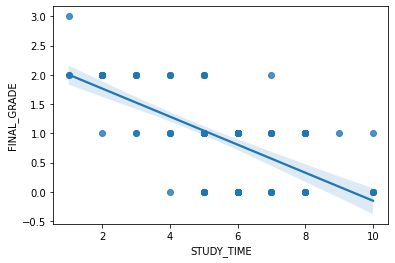

In [ ]:
stdst = sns.regplot(x = 'STUDY_TIME', y = 'FINAL_GRADE',  data = std )

Best-fit values


Slope           =   -0.2393 ± 0.02093,
Y-intercept   =   2.244 ± 0.1167,
X-intercept     =  9.379,
1/Slope        =    -4.179

95% Confidence Intervals


Slope         =     -0.2803 to -0.1982,
Y-intercept    =  2.015 to 2.473,
X-intercept    =  8.689 to 10.32

Equation: 
 Y = -0.2393*X + 2.244

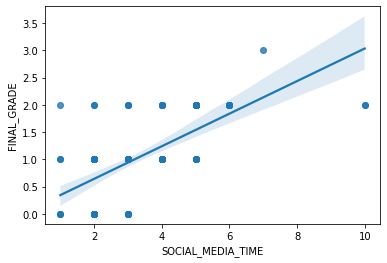

In [ ]:
stdsmt = sns.regplot(x = 'SOCIAL_MEDIA_TIME', y = 'FINAL_GRADE',  data = std)

Best-fit values


Slope      =         0.2988 ± 0.02839,
Y-intercept     =  0 04788 ± 0 1005,
X-intercept   =    -0.1603,
1/Slope       =     3.347


95% Confidence Intervals


Slope          =     0.2431 to 0.3544,
Y-intercept    =  -0.1490 to 0.2448,
X-intercept  =    -0.9891 to 0.4280


Goodness of Fit


R square      =    0.4280,
Sy.x            =     0.5348


Equation: 
 Y = 0.2988*X + 0.04788




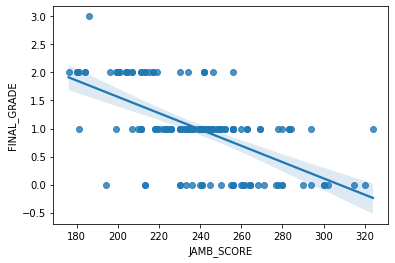

In [ ]:
stdjamb = sns.regplot(x = 'JAMB_SCORE', y = 'FINAL_GRADE',  data = std, scatter=True)


Best-fit values

Slope  =            -0.01453 ± 0.001539,
Y-intercept   =   4.470 ± 0.3703,
X-intercept  =   307.6,
1/Slope        =   -68.83,


95% Confidence Intervals


Slope       =       -0.01754 to -0.01151,
Y-intercept    = 3.744 to 5.196,
X-intercept  =   294.5 to 326.9,


Goodness of Fit


R square   =  0.3760,
Sy.x         =   0.5586,


Equation: 
 Y = -0.01453*X + 4.470

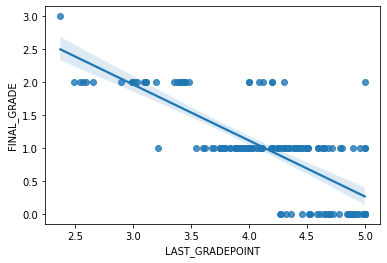

In [ ]:
stdlgp = sns.regplot (x = 'LAST_GRADEPOINT', y = 'FINAL_GRADE',  data = std, scatter=True)

Best-fit values


Slope           =      -0.8484 ± 0.05801,
Y-intercept      =   4.510 ± 0.2428,
X-intercept     =    5.316,
1/Slope          =     -1.179

95% Confidence Intervals


Slope             =       -0.9621 to -0.7347,
Y-intercept     =       4.034 to 4.985,
X-intercept     =      5.155 to 5.520


Goodness of Fit   
R square          =     0.5910,
Sy.x                 =     0.4522


Equation:
 Y = -0.8484*X + 4.510


Using Pandas Dummy as opposed to label Encoder to split to the Seperate column.

In [ ]:
finalgrade = pd.get_dummies(std['FINAL_GRADE'])
finalgrade.head()


,0,1,2,3
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0


In [ ]:
std1 = pd.concat([std, finalgrade,], axis ='columns')
std1.head()

,LAST_GRADEPOINT,JAMB_SCORE,SOCIAL_MEDIA_TIME,STUDY_TIME,MOTIVATING_FACTOR,FINAL_GRADE,0,1,2,3
0,5.00,200,6,2,1,2,0,0,1,0
1,3.10,219,6,2,0,2,0,0,1,0
2,4.70,315,3,8,0,0,1,0,0,0
3,2.37,186,7,1,1,3,0,0,0,1
4,5.00,320,2,8,1,0,1,0,0,0


Splitting datasets to Training set, Validation set and Test set


In [ ]:
#Using Z to represent final grade
Z = std['FINAL_GRADE']

In [ ]:
x_train, x_test, z_train, z_test = train_test_split(X, Z,  test_size = 0.2, random_state = 42)

Building Decision Tree Model

In [ ]:
dt =DecisionTreeClassifier()
dtfit = dt.fit(x_train, z_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [ ]:
z_pred = dtfit.predict(x_test)

In [ ]:
print(z_pred)

[0 0 0 1 1 1 0 1 0 1 1 1 2 1 2 2 1 0 0 2 2 2 1 1 1 0 1 2 2 2]


Evaluating Model

In [ ]:
print ("Accuracy of model:", metrics.accuracy_score(z_test, z_pred))

Accuracy of model: 0.7666666666666667


Confusion Matrix

In [ ]:
print(metrics.confusion_matrix(z_test, z_pred))


[[ 5  1  0]
 [ 3 12  3]
 [ 0  0  6]]


In [ ]:
print(metrics.classification_report (z_test, z_pred))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.92      0.67      0.77        18
           2       0.67      1.00      0.80         6

   micro avg       0.77      0.77      0.77        30
   macro avg       0.74      0.83      0.76        30
weighted avg       0.81      0.77      0.77        30



Visualizing the Decision Tree

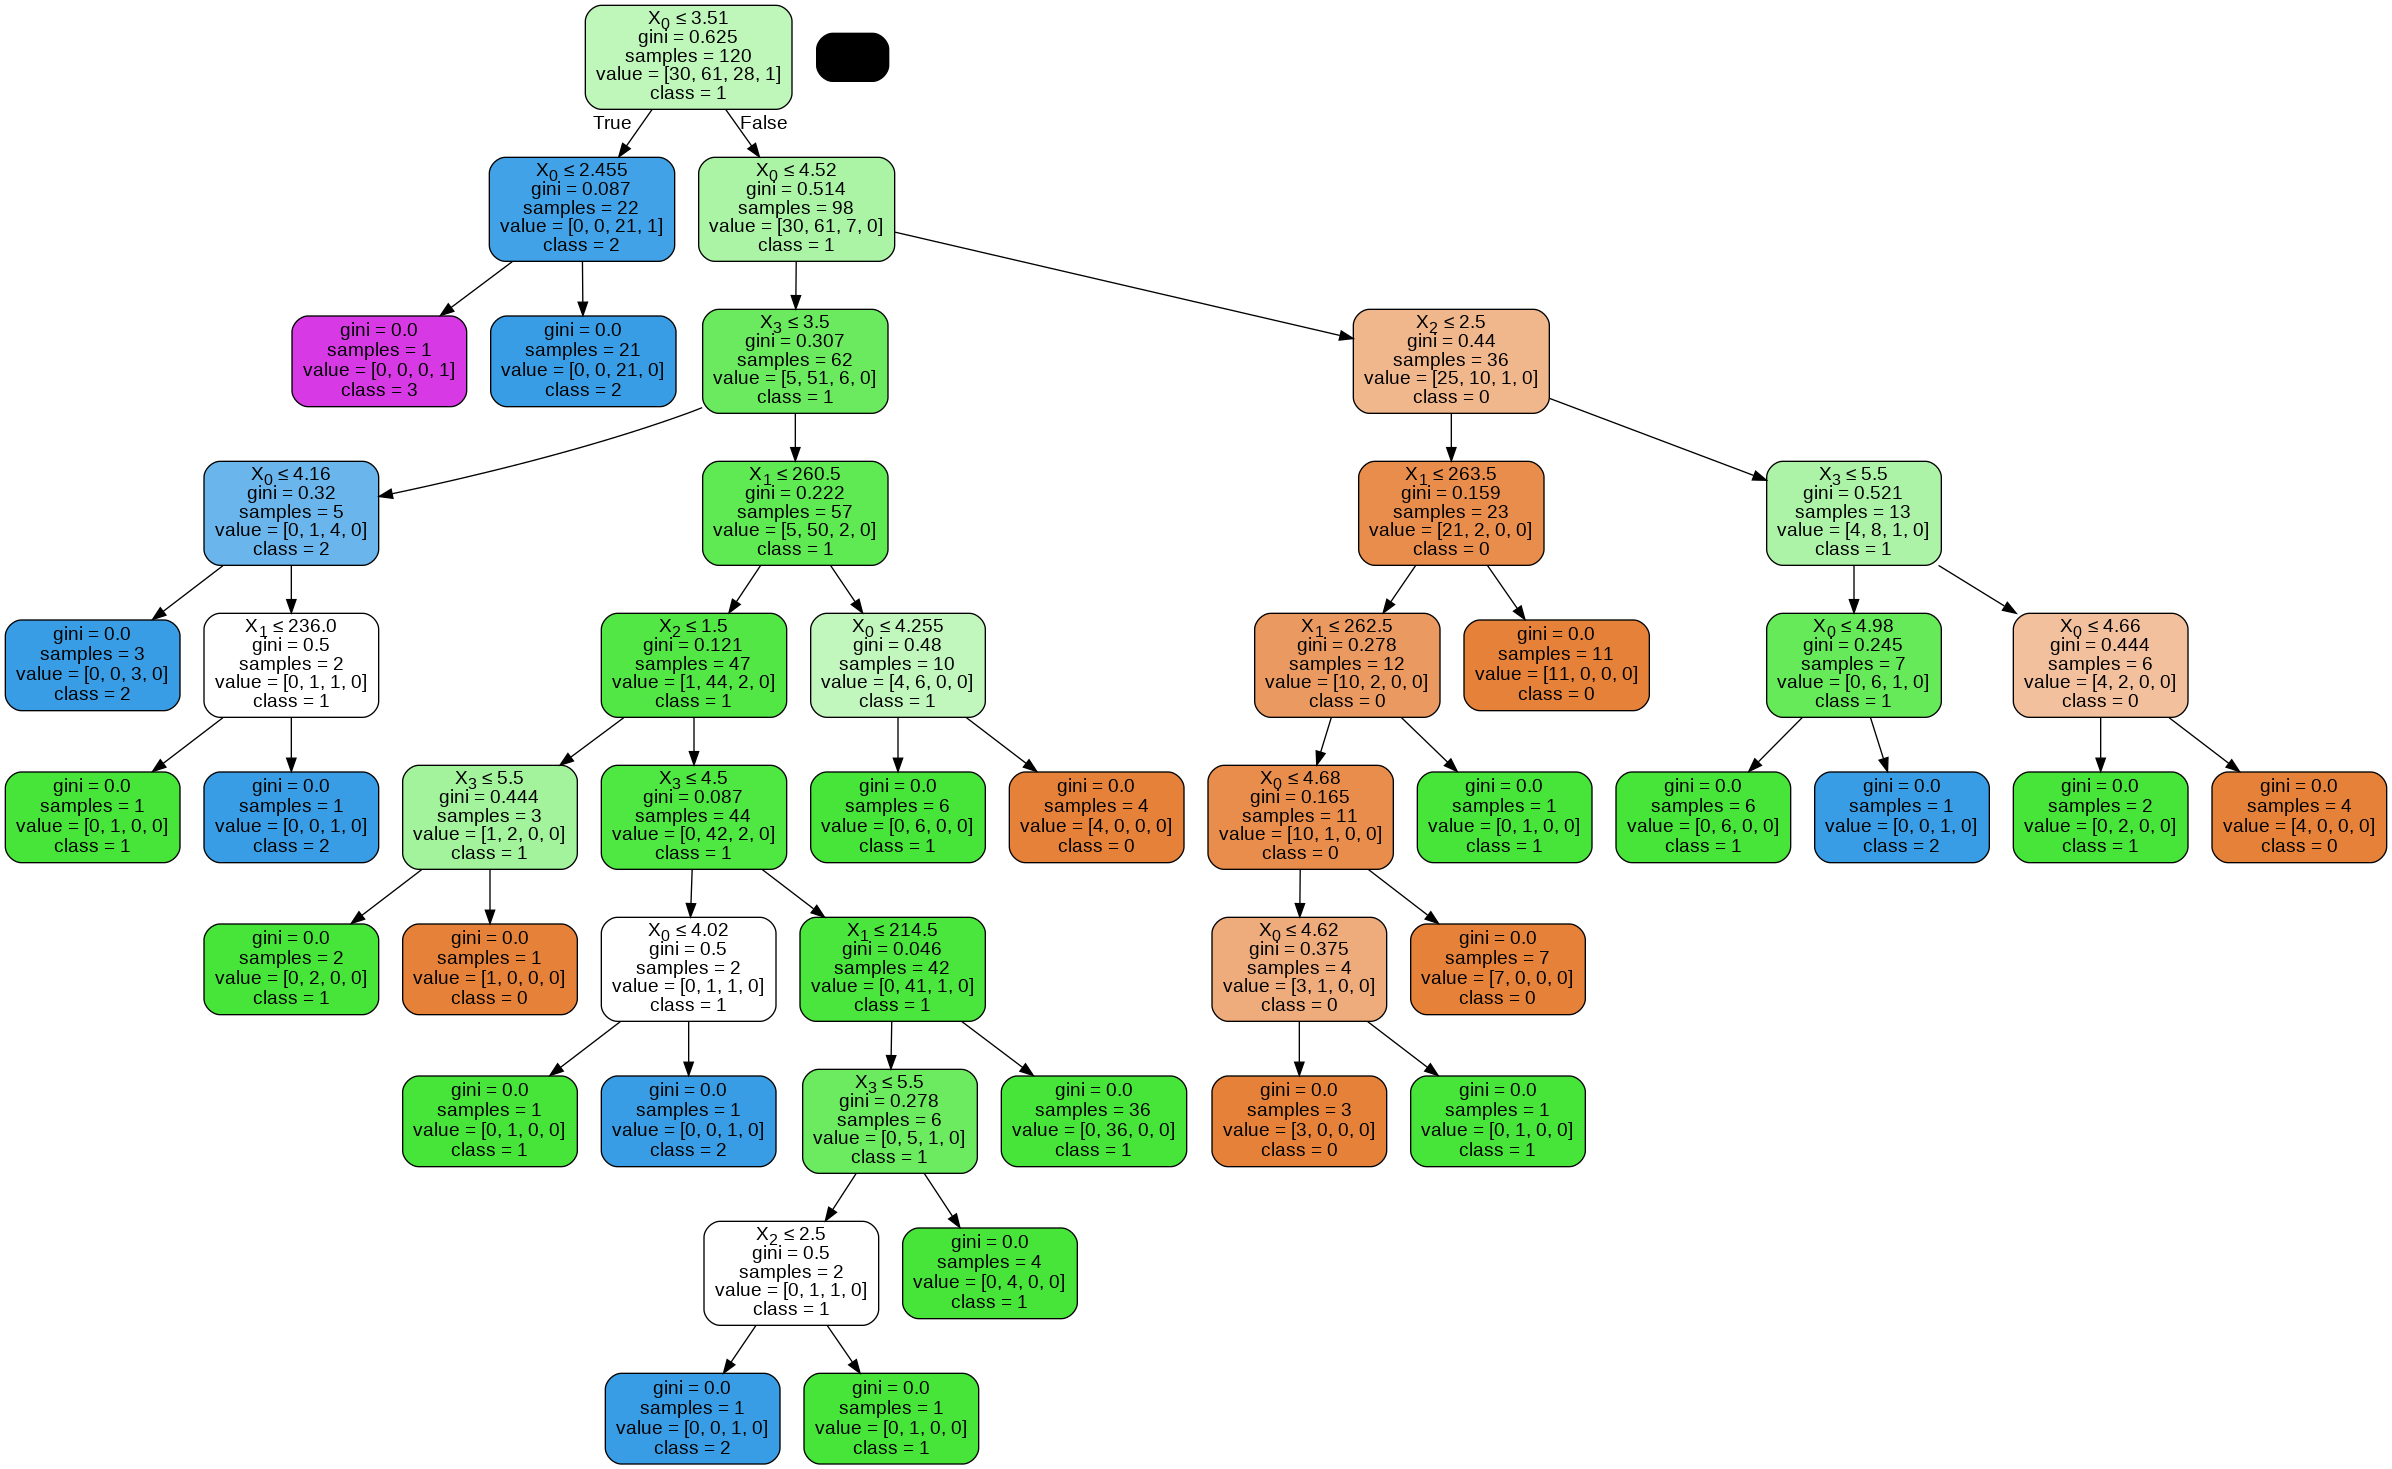

In [ ]:
dot_data = StringIO()
export_graphviz (dtfit, out_file=dot_data, filled=True, rounded=True, 
                            special_characters=True,  feature_names = None,  class_names=['0','1','2','3'])
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
graph.write_png('grades.png')
Image(graph.create_png())